In [ ]:
from scipy.io import arff
import pandas as pd
# Load ARFF file
file_path = "/content/drive/MyDrive/phishing+websites/Training Dataset.arff"
data, meta = arff.loadarff(file_path)

In [ ]:
# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Convert byte values to integers
for col in df.columns:
    df[col] = df[col].str.decode('utf-8').astype(int)

In [ ]:
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [ ]:
# Display first few rows
print(df.head())

   having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   Domain_registeration_length  Favicon  ...  popUpWidnow  Iframe  \

In [ ]:
# Display basic statistics
print("Dataset Overview:\n")
print(df.describe())


Dataset Overview:

       having_IP_Address    URL_Length  Shortining_Service  having_At_Symbol  \
count       11055.000000  11055.000000        11055.000000      11055.000000   
mean            0.313795     -0.633198            0.738761          0.700588   
std             0.949534      0.766095            0.673998          0.713598   
min            -1.000000     -1.000000           -1.000000         -1.000000   
25%            -1.000000     -1.000000            1.000000          1.000000   
50%             1.000000     -1.000000            1.000000          1.000000   
75%             1.000000     -1.000000            1.000000          1.000000   
max             1.000000      1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count              11055.000000   11055.000000       11055.000000   
mean                   0.741474      -0.734962           0.063953   
std                    0.671011       0.678139       

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report       

In [ ]:
# Extract target variable
y = df['Result']

# Display unique values in the target variable
print("\nUnique values in target:\n", y.unique())

# Print first few target values
print("\nFirst few target values:\n", y.head())



Unique values in target:
 [-1  1]

First few target values:
 0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target variable

# Check dimensions
print("\nFeature shape:", X.shape)
print("Target shape:", y.shape)



Feature shape: (11055, 30)
Target shape: (11055,)


In [ ]:
print("\nFeature Names:\n", X.columns.tolist())



Feature Names:
 ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [ ]:
from scipy.stats import skew

# Compute skewness for each feature
skew_values = X.apply(lambda col: skew(col))
print("\nSkewness of Features:\n", skew_values)



Skewness of Features:
 having_IP_Address             -0.660975
URL_Length                     1.635927
Shortining_Service            -2.192273
having_At_Symbol              -1.963625
double_slash_redirecting      -2.210120
Prefix_Suffix                  2.167680
having_Sub_Domain             -0.118109
SSLfinal_State                -0.515432
Domain_registeration_length    0.715326
Favicon                       -1.616435
port                          -2.125421
HTTPS_token                   -1.830114
Request_URL                   -0.380280
URL_of_Anchor                  0.113001
Links_in_tags                  0.202645
SFH                            1.475849
Submitting_to_email           -1.646766
Abnormal_URL                  -1.989772
Redirect                       2.402978
on_mouseover                  -2.354114
RightClick                    -4.502198
popUpWidnow                   -1.553309
Iframe                        -2.832787
age_of_domain                 -0.122709
DNSRecord       

In [ ]:
from scipy.stats import kurtosis

# Compute kurtosis for each feature
kurt_values = X.apply(lambda col: kurtosis(col))
print("\nKurtosis of Features:\n", kurt_values)



Kurtosis of Features:
 having_IP_Address              -1.563113
URL_Length                      0.710986
Shortining_Service              2.806062
having_At_Symbol                1.855822
double_slash_redirecting        2.884631
Prefix_Suffix                   2.698838
having_Sub_Domain              -1.494252
SSLfinal_State                 -1.598978
Domain_registeration_length    -1.488309
Favicon                         0.612863
port                            2.517415
HTTPS_token                     1.349319
Request_URL                    -1.855387
URL_of_Anchor                  -1.042569
Links_in_tags                  -1.264232
SFH                             0.362375
Submitting_to_email             0.711839
Abnormal_URL                    1.959192
Redirect                        3.774302
on_mouseover                    3.541854
RightClick                     18.269785
popUpWidnow                     0.412768
Iframe                          6.024680
age_of_domain                  -1

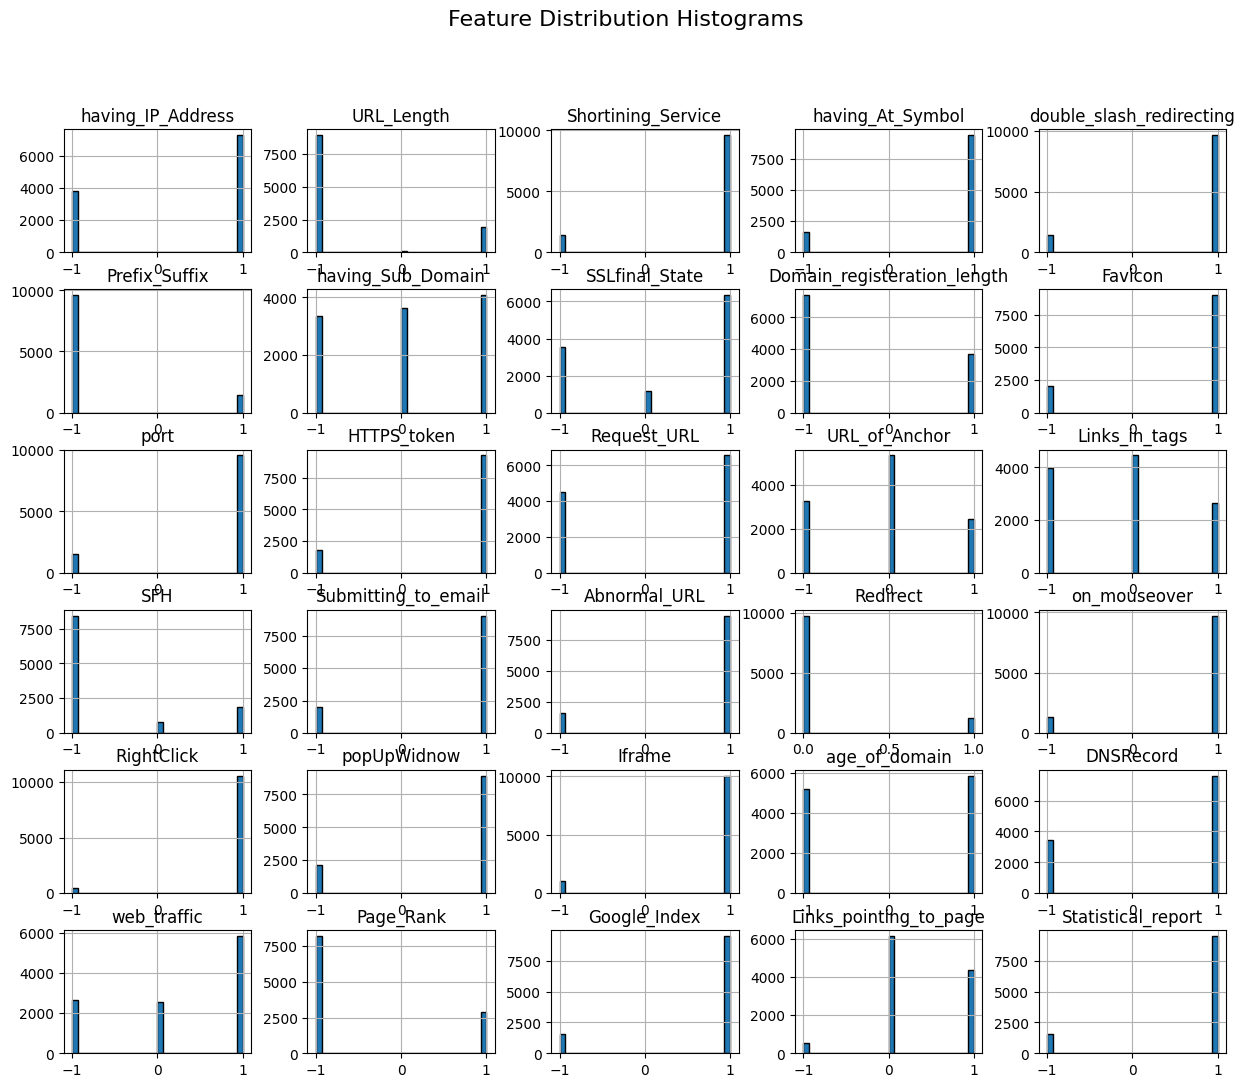

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all features
X.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16)
plt.show()


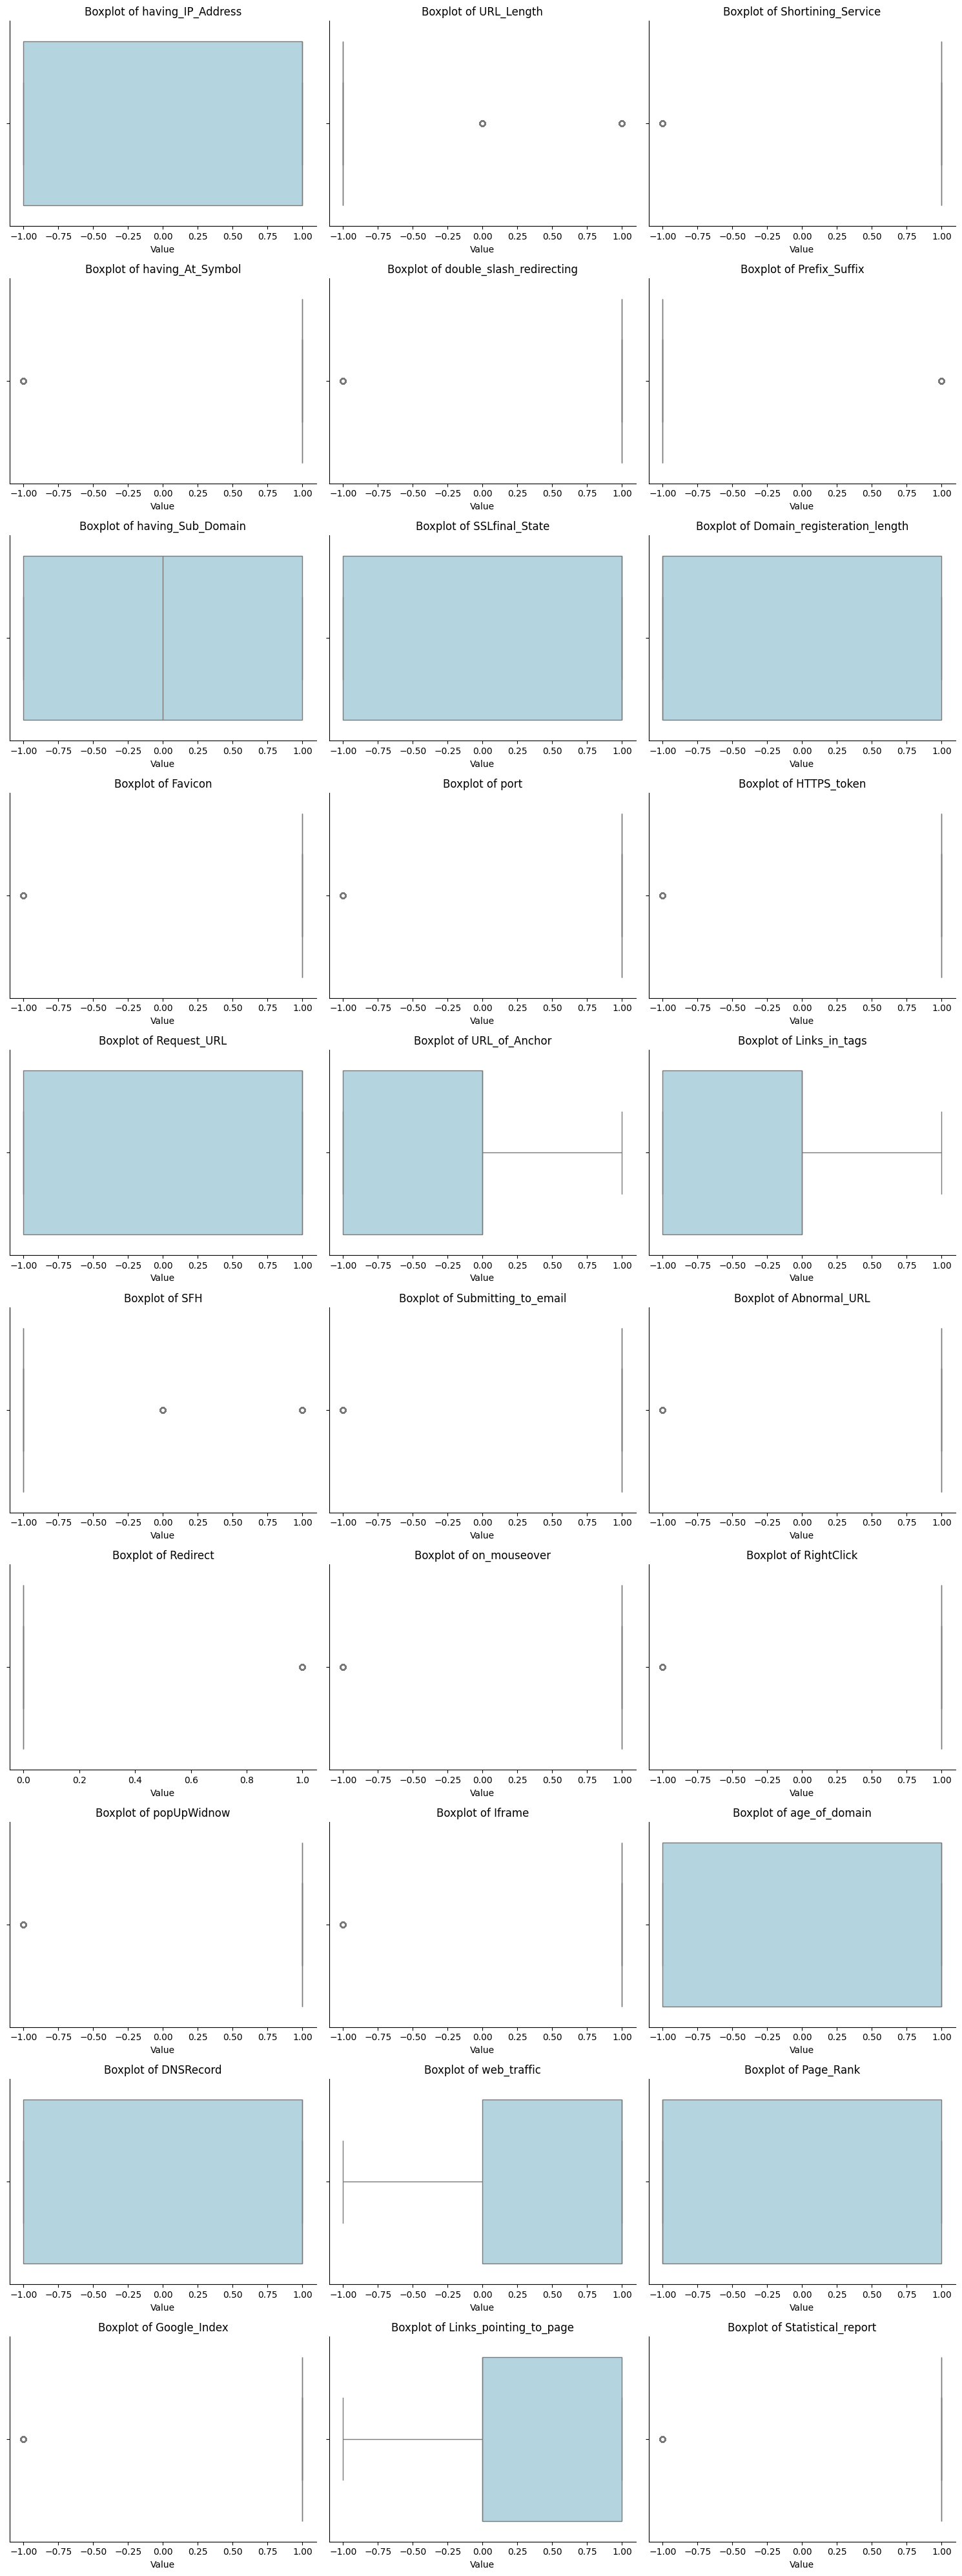

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Number of features
num_features = len(X.columns)

# Determine the grid layout
rows = math.ceil(num_features / 3)  # 3 columns per row
cols = 3 if num_features > 3 else num_features

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each feature separately
for i, feature in enumerate(X.columns):
    sns.boxplot(x=X[feature], ax=axes[i], color="lightblue")
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("Value")
    sns.despine(ax=axes[i])  # Remove grid

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # First quartile (25th percentile)
    Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only values within bounds
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Apply the function to remove outliers
df_cleaned = remove_outliers(X)

# Check dataset shape before and after outlier removal
print("Original shape:", X.shape)
print("New shape after outlier removal:", df_cleaned.shape)


Original shape: (11055, 30)
New shape after outlier removal: (3151, 30)


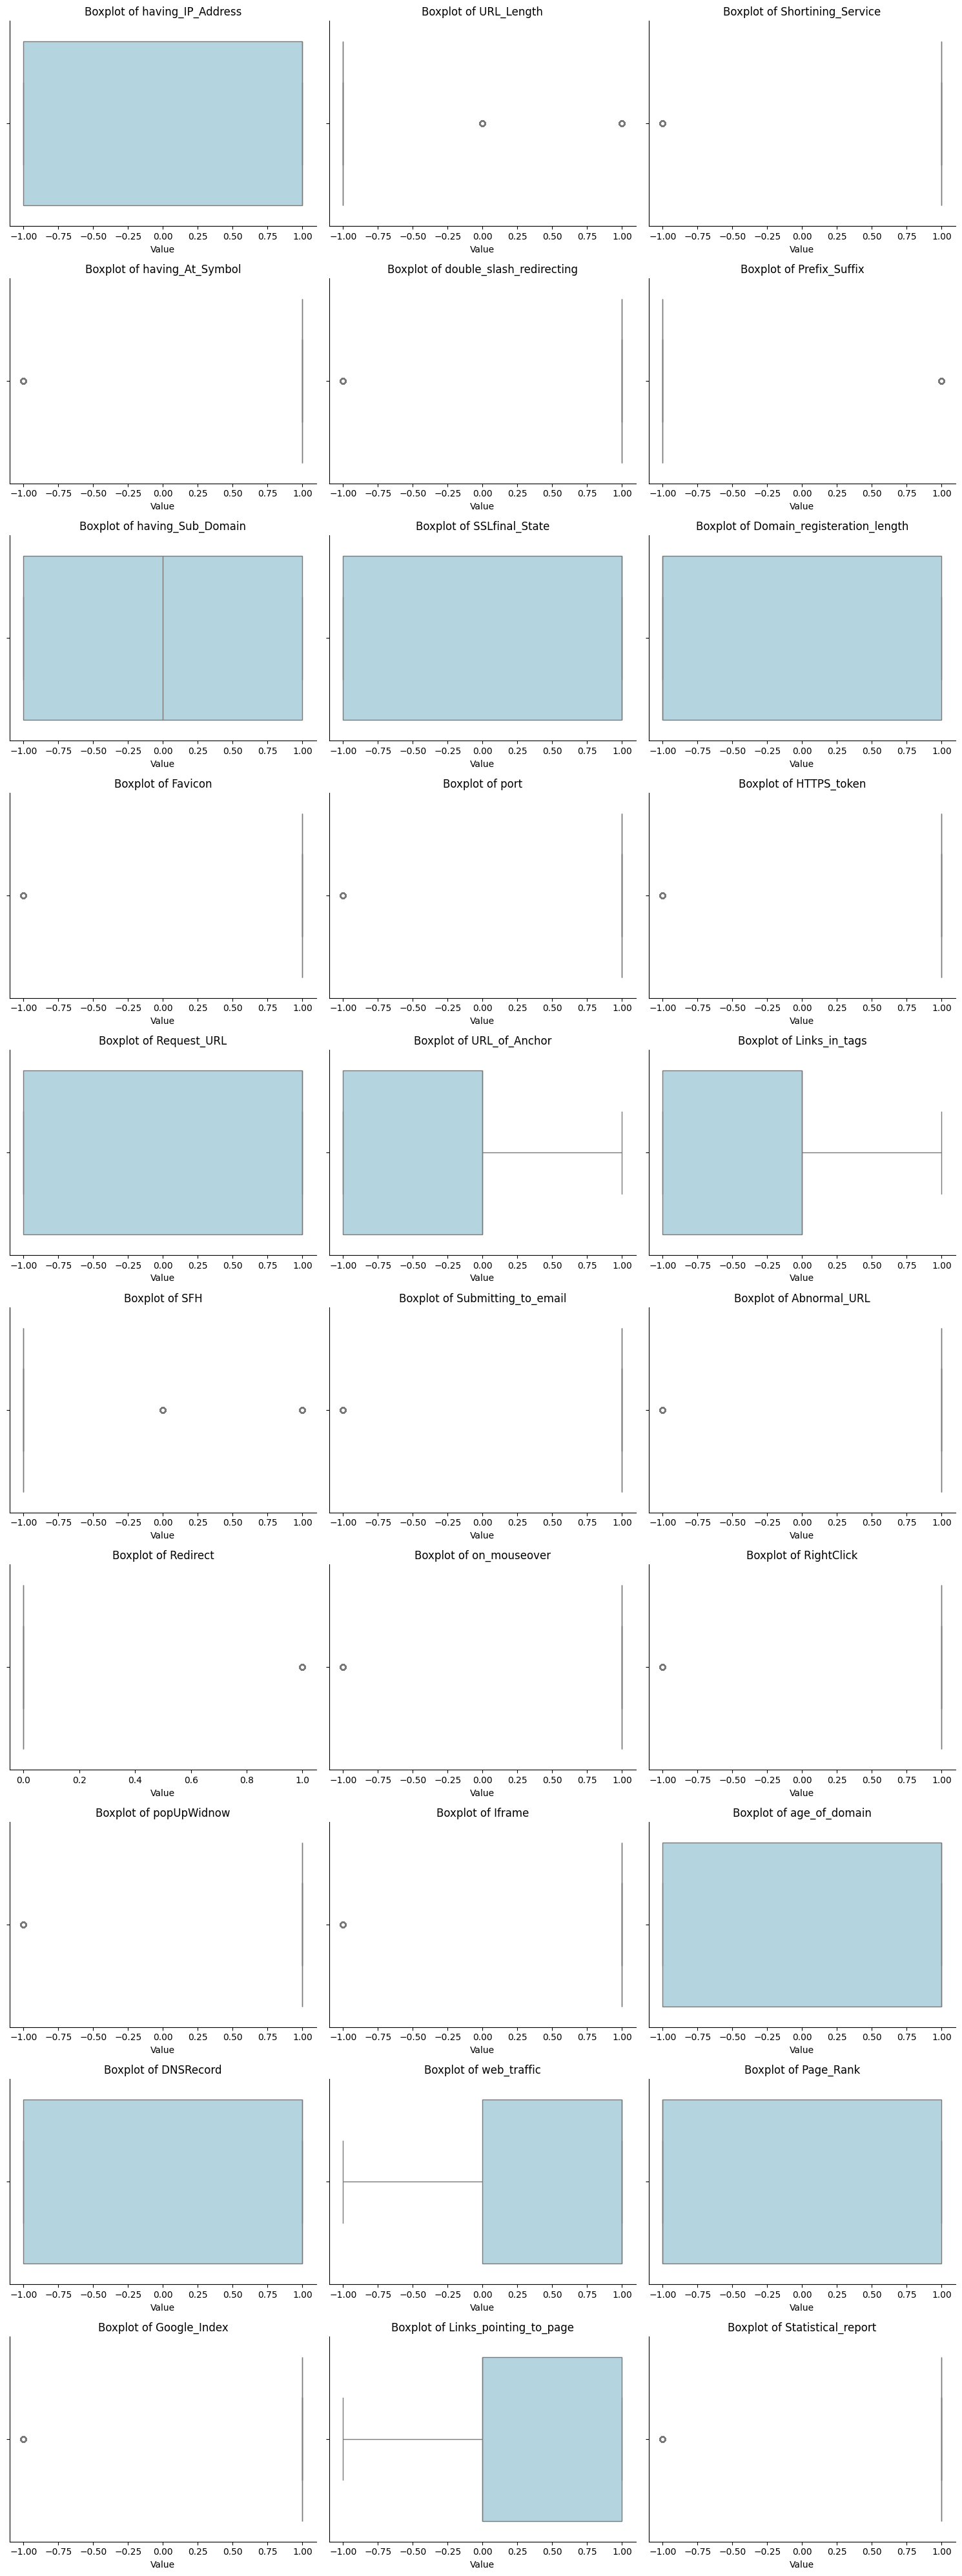

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Number of features
num_features = len(X.columns)

# Determine the grid layout
rows = math.ceil(num_features / 3)  # 3 columns per row
cols = 3 if num_features > 3 else num_features

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each feature separately
for i, feature in enumerate(X.columns):
    sns.boxplot(x=X[feature], ax=axes[i], color="lightblue")
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("Value")
    sns.despine(ax=axes[i])  # Remove grid

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


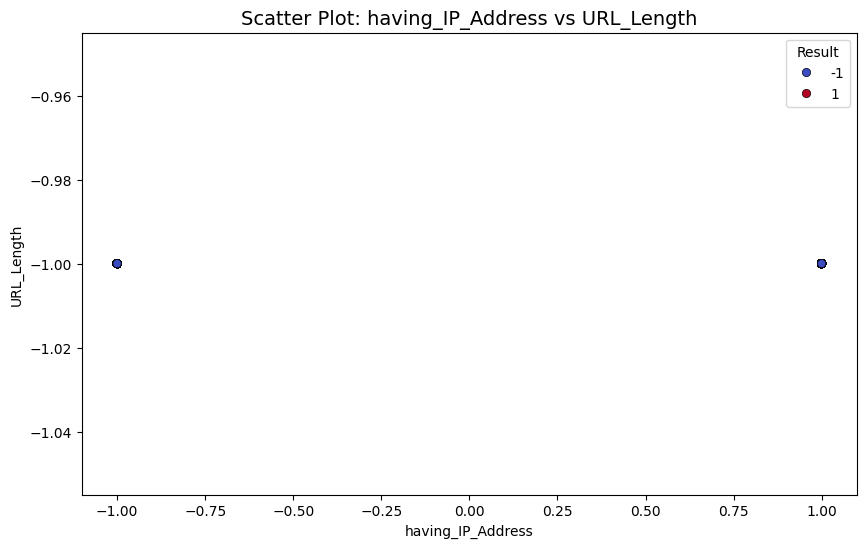

In [ ]:
# Select two features for scatter plot
feature1 = df_cleaned.columns[0]  # First feature
feature2 = df_cleaned.columns[1]  # Second feature

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned[feature1], y=df_cleaned[feature2], hue=y, palette="coolwarm", edgecolor="k")

# Titles and labels
plt.title(f"Scatter Plot: {feature1} vs {feature2}", fontsize=14)
plt.xlabel(feature1)
plt.ylabel(feature2)

# Show plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Reset index for both df_cleaned and y to ensure they match
df_cleaned = df_cleaned.reset_index(drop=True)
y = y.loc[df_cleaned.index].reset_index(drop=True)

# Now split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)
y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)
print("Shapes after fixing:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes after fixing: (2520, 30) (631, 30) (2520,) (631,)


In [ ]:
print(y_train)

1295    0
2737    1
764     0
1494    0
2805    0
       ..
3092    1
1095    0
1130    1
1294    0
860     1
Name: Result, Length: 2520, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampling the training set only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the new class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Check shapes
print("Original Training Shape:", X_train.shape, y_train.shape)
print("New Balanced Training Shape:", X_train_smote.shape, y_train_smote.shape)


Class distribution after SMOTE:
Result
0    1397
1    1397
Name: count, dtype: int64
Original Training Shape: (2520, 30) (2520,)
New Balanced Training Shape: (2794, 30) (2794,)


In [ ]:
print("Target distribution:\n", y.value_counts())


Target distribution:
 Result
 1    1755
-1    1396
Name: count, dtype: int64


In [ ]:
print("Total rows in DataFrame:", df.shape[0])
print("Non-null values in 'Result':", df['Result'].notnull().sum())
print("Missing values in 'Result':", df['Result'].isnull().sum())


Total rows in DataFrame: 11055
Non-null values in 'Result': 11055
Missing values in 'Result': 0


In [ ]:
print("Index length of df:", len(df.index))
print("Index length of y:", len(df['Result'].index))


Index length of df: 11055
Index length of y: 11055


In [ ]:
# Drop rows where 'Result' is missing
df_clean = df.dropna(subset=['Result'])
print("Shape after dropping missing 'Result':", df_clean.shape)

# Redefine X and y from the cleaned DataFrame
X = df_clean.drop(columns=['Result'])
y = df_clean['Result']

# Confirm shapes are now equal
print("X shape:", X.shape)
print("y shape:", y.shape)


Shape after dropping missing 'Result': (11055, 31)
X shape: (11055, 30)
y shape: (11055,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# 1. Ensure alignment by cleaning the DataFrame if necessary:
df_clean = df.dropna(subset=['Result'])
X = df_clean.drop(columns=['Result'])
y = df_clean['Result']

print("After cleaning:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 5. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("✅ Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


After cleaning:
X shape: (11055, 30)
y shape: (11055,)
✅ Random Forest Accuracy: 0.9669832654907282
✅ Gradient Boosting Accuracy: 0.9507010402532791


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Select top 20 features (you can experiment with k)
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Re-train on selected features
lr_model = LogisticRegression()
lr_model.fit(X_train_selected, y_train)
y_pred_lr = lr_model.predict(X_test_selected)
print("Improved Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Improved Logistic Regression Accuracy: 0.9249208502939846


In [ ]:
import numpy as np

importances = rf.feature_importances_
top_indices = np.argsort(importances)[::-1][:10]
print("Top 10 Important Features:")
for idx in top_indices:
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")


Top 10 Important Features:
SSLfinal_State: 0.3262
URL_of_Anchor: 0.2455
web_traffic: 0.0697
having_Sub_Domain: 0.0645
Links_in_tags: 0.0433
Prefix_Suffix: 0.0378
SFH: 0.0203
Request_URL: 0.0193
Links_pointing_to_page: 0.0188
Domain_registeration_length: 0.0176


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Keep top 20 features
selector = SelectKBest(score_func=f_classif, k=20)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)


In [ ]:
from xgboost import XGBClassifier


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier  # Import XGBClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Replace -1 with 0 in y_train before fitting
y_train_fixed = y_train.replace(-1, 0)

grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_fs, y_train_fixed) # Use the fixed y_train

print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_fs)
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:46:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Tuned XGBoost Accuracy: 0.5526910900045229


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=3, verbose=1, n_jobs=-1)
# Replace -1 with 0 in y_train before fitting
y_train_fixed = y_train.replace(-1, 0)
grid_search.fit(X_train_fs, y_train_fixed) # Use the fixed y_train


print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_fs)

# If y_test also has -1, replace them with 0 for accuracy calculation
y_test_fixed = y_test.replace(-1, 0)
print("Tuned XGBoost Accuracy:", accuracy_score(y_test_fixed, y_pred_best))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Tuned XGBoost Accuracy: 0.9624604251469923


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_train_fixed = y_train.replace({-1: 0, 1: 1})
y_test_fixed = y_test.replace({-1: 0, 1: 1})


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_pca))


PCA + Logistic Regression Accuracy: 0.9271822704658526


In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
], voting='soft')

voting.fit(X_train_fs, y_train)
y_pred_voting = voting.predict(X_test_fs)

print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred_voting))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Ensemble Accuracy: 0.9606512890094979


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Classification Report
print("🔹 Logistic Regression Classification Report 🔹")
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Classification Report 🔹
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Classification Report
print("🔹 Random Forest Classification Report 🔹")
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Classification Report 🔹
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
from xgboost import XGBClassifier

# Convert target labels from {-1, 1} to {0, 1}
y_train = y_train.replace(-1, 0)  # Replace -1 with 0
y_test = y_test.replace(-1,0)

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print("🔹 XGBoost Classification Report 🔹")
print(classification_report(y_test, y_pred_xgb))

🔹 XGBoost Classification Report 🔹
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



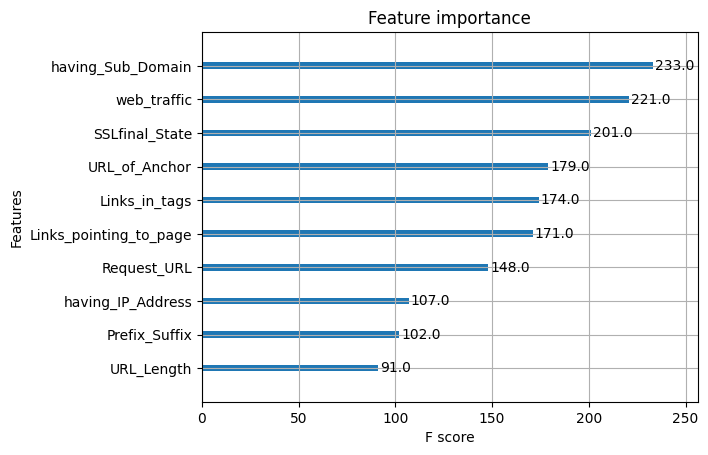

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best params
print("Best Hyperparameters:", grid_search.best_params_)

# Train model with best params
best_xgb = XGBClassifier(**grid_search.best_params_)
best_xgb.fit(X_train_smote, y_train_smote)

# Predict
y_pred_xgb_best = best_xgb.predict(X_test)

# Print new accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_best))


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.41      0.46      0.43       956
           1       0.55      0.50      0.52      1255

    accuracy                           0.48      2211
   macro avg       0.48      0.48      0.48      2211
weighted avg       0.49      0.48      0.48      2211



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


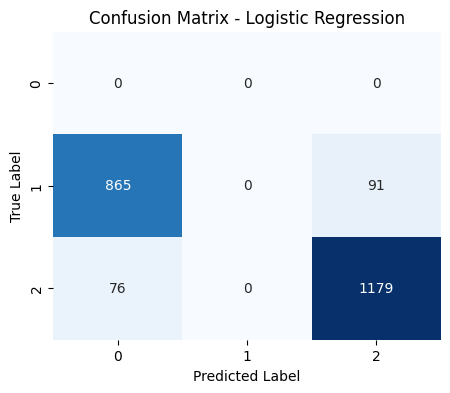

In [ ]:
# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


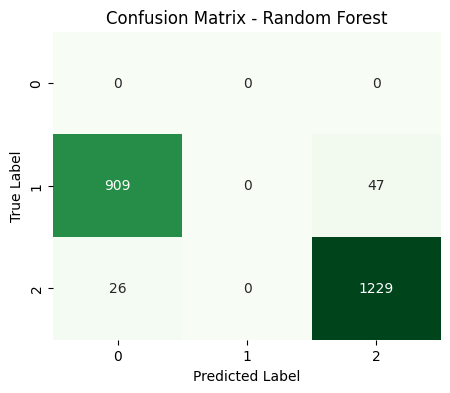

In [ ]:
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


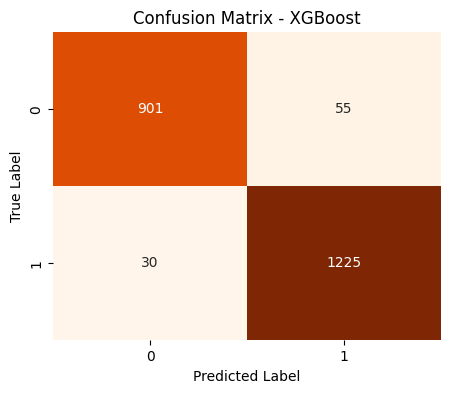

In [ ]:
# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define an improved ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a lower learning rate
ann_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Predictions
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

# Classification Report
print("🔹 Improved ANN Classification Report 🔹")
print(classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7960 - loss: 0.4541 - val_accuracy: 0.9303 - val_loss: 0.1777
Epoch 2/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9256 - loss: 0.1964 - val_accuracy: 0.9344 - val_loss: 0.1673
Epoch 3/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9275 - loss: 0.1804 - val_accuracy: 0.9358 - val_loss: 0.1588
Epoch 4/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9396 - loss: 0.1581 - val_accuracy: 0.9380 - val_loss: 0.1536
Epoch 5/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9412 - loss: 0.1505 - val_accuracy: 0.9403 - val_loss: 0.1440
Epoch 6/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9423 - loss: 0.1451 - val_accuracy: 0.9426 - val_loss: 0.1405
Epoch 7/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9453 - loss: 0.1354 - val_accuracy: 0.9435 - val_loss: 0.1380
Epoch 8/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9391 - loss: 0.1408 - val_accuracy: 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
ann_model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.5092 - loss: 0.7105 - val_accuracy: 0.3541 - val_loss: 0.7194
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5151 - loss: 0.6980 - val_accuracy: 0.4066 - val_loss: 0.7125
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5404 - loss: 0.6890 - val_accuracy: 0.5034 - val_loss: 0.6972
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5237 - loss: 0.6924 - val_accuracy: 0.3555 - val_loss: 0.7280
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5325 - loss: 0.6923 - val_accuracy: 0.3740 - val_loss: 0.7261
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5049 - loss: 0.6936 - val_accuracy: 0.4215 - val_loss: 0.7142
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5112 - loss: 0.6916 - val_accuracy: 0.4057 - val_loss: 0.7109
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5164 - loss: 0.6915 - val_accuracy: 0.4007 - val_loss: 0.7074


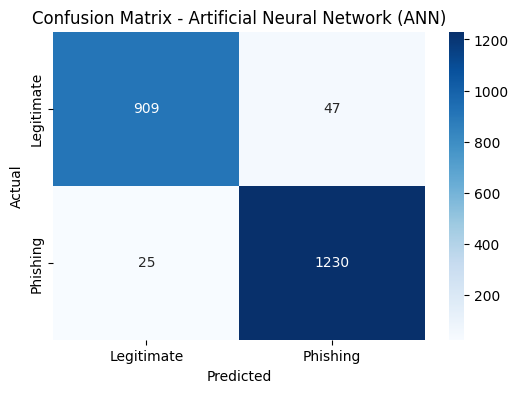

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert ANN predictions to binary (0 or 1)
y_pred_ann_binary = (y_pred_ann > 0.5).astype(int)

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# ANN Confusion Matrix
plot_confusion_matrix(y_test, y_pred_ann_binary, "Artificial Neural Network (ANN)")


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler (scales values between 0 and 1)
scaler = MinMaxScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)

print("✅ Min-Max Normalization Applied!")


✅ Min-Max Normalization Applied!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# XGBoost Tuned
y_pred_xgb_best = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb_best)
print(f" XGBoost Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, y_pred_xgb_best))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f" Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))

# ANN Model
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)  # Convert probabilities to binary labels
ann_accuracy = accuracy_score(y_test, y_pred_ann)
print(f" ANN Accuracy: {ann_accuracy:.4f}")
print(classification_report(y_test, y_pred_ann))


 XGBoost Accuracy: 0.4794
              precision    recall  f1-score   support

           0       0.41      0.46      0.43       956
           1       0.55      0.50      0.52      1255

    accuracy                           0.48      2211
   macro avg       0.48      0.48      0.48      2211
weighted avg       0.49      0.48      0.48      2211

 Random Forest Accuracy: 0.5559
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.56      2211
   macro avg       0.32      0.33      0.32      2211
weighted avg       0.55      0.56      0.55      2211



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 ANN Accuracy: 0.5007
              precision    recall  f1-score   support

           0       0.39      0.28      0.33       956
           1       0.55      0.67      0.60      1255

    accuracy                           0.50      2211
   macro avg       0.47      0.47      0.47      2211
weighted avg       0.48      0.50      0.48      2211



<ipython-input-59-647a6ed2f7f6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


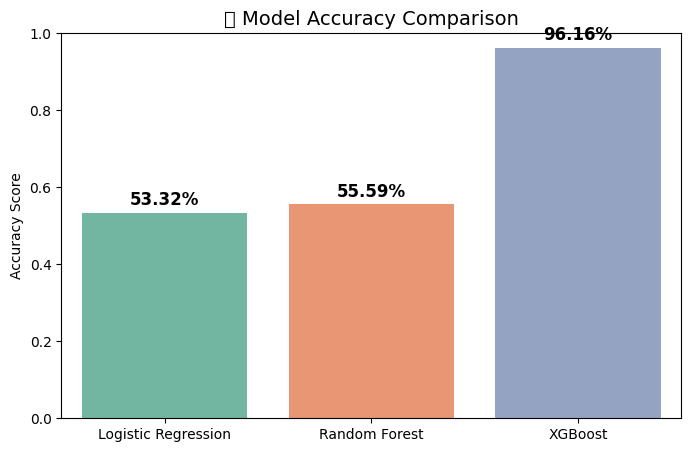

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Compute accuracy scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Logistic Regression
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Random Forest
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)  # XGBoost

# Store results in a dictionary
accuracy_scores = {
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf,
    "XGBoost": accuracy_xgb
}

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="Set2")

# Add title and labels
plt.title("🔹 Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Display accuracy values on top of bars
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12, fontweight='bold')

# Show plot
plt.show()


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


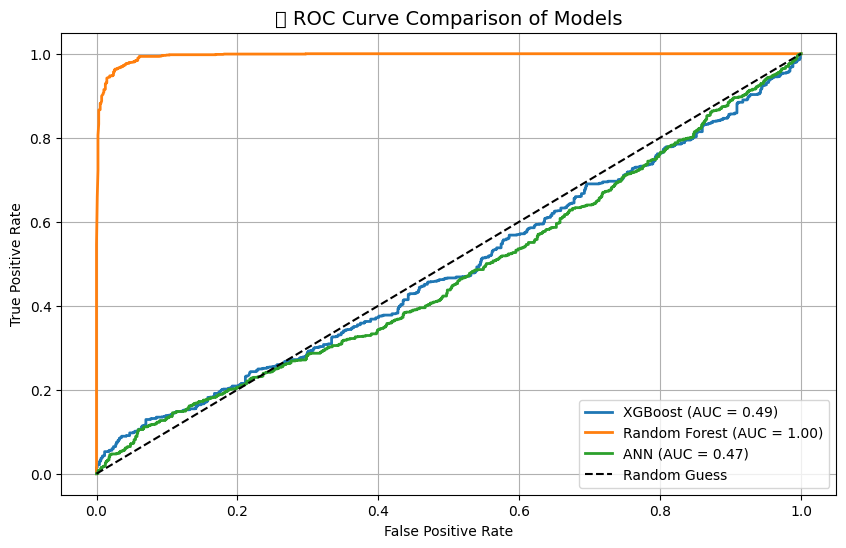

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get predicted probabilities for the positive class
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_ann = ann_model.predict(X_test).ravel()  # Already a probability from sigmoid output

# 2. Compute ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_proba_ann)

auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_rf = auc(fpr_rf, tpr_rf)
auc_ann = auc(fpr_ann, tpr_ann)

# 3. Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})', linewidth=2)

# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Labels and legend
plt.title('🔍 ROC Curve Comparison of Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from scipy.io import arff
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.weightstats import ztest

# 📂 Load ARFF file
# Updated file_path to include the full path to the file
file_path = "/content/drive/MyDrive/phishing+websites/Training Dataset.arff"
data, meta = arff.loadarff(file_path)

# 🧹 Convert to DataFrame and decode bytes
df = pd.DataFrame(data)
for col in df.columns:
    df[col] = df[col].str.decode('utf-8').astype(int)

# 🎯 Separate features and target
X = df.drop(columns=['Result'])
y = df['Result']

# 🔍 Select a feature to test (e.g., 'URL_Length')
feature = X.columns[0]  # Automatically pick first feature (or replace manually)

print(f"\nSelected Feature for Testing: {feature}")

# 1. 🔹 Z-test
z_stat, z_p = ztest(X[feature], value=0)
print("\n📊 Z-test")
print(f"Z-statistic: {z_stat:.4f}, P-value: {z_p:.4f}")

# 2. 🔹 One-sample t-test
t_stat, t_p = ttest_1samp(X[feature], 0)
print("\n📊 One-sample T-test")
print(f"T-statistic: {t_stat:.4f}, P-value: {t_p:.4f}")

# 3. 🔹 Two-sample t-test (Result = 1 vs -1)
group1 = X[y == 1][feature]
group2 = X[y == -1][feature]
t2_stat, t2_p = ttest_ind(group1, group2)
print("\n📊 Two-sample T-test (Result = 1 vs -1)")
print(f"T-statistic: {t2_stat:.4f}, P-value: {t2_p:.4f}")

# 4. 🔹 ANOVA (Result = -1, 0, 1)
group_neg1 = X[y == -1][feature]
group_0 = X[y == 0][feature]
group_1 = X[y == 1][feature]
anova_stat, anova_p = f_oneway(group_neg1, group_0, group_1)
print("\n📊 ANOVA Test (Result = -1, 0, 1)")
print(f"F-statistic: {anova_stat:.4f}, P-value: {anova_p:.4f}")


Selected Feature for Testing: having_IP_Address

📊 Z-test
Z-statistic: 34.7468, P-value: 0.0000

📊 One-sample T-test
T-statistic: 34.7468, P-value: 0.0000

📊 Two-sample T-test (Result = 1 vs -1)
T-statistic: 9.9435, P-value: 0.0000

📊 ANOVA Test (Result = -1, 0, 1)
F-statistic: nan, P-value: nan


<ipython-input-62-0c6695fd5c4c>:46: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_stat, anova_p = f_oneway(group_neg1, group_0, group_1)
